# **Sentiment Analysis on Airline Tweets Dataset**

The dataset we used fot this sentiment analysis contains tweets on US Airlines of 2015. We applied some data preprocessing or wrangling techniques to remove unnecessary characters,symbols and tokens.Different machine learningalgorithms are used to bulild the models, evaluate the performance and make the predictions.


 **Data dictionary**

  tweet_id
  airline_sentiment
  airline_sentiment_confidence
  negativereason
  negativereason_confidence
  airline
  airline_sentiment_gold
  name
  negativereason_gold
  retweet_count	text
  tweet_coord
  tweet_created
  tweet_location
  user_timezone

    

In [136]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import string
import re
import nltk

import warnings
warnings.filterwarnings('ignore')

In [137]:
# read csv dataset
df = pd.read_csv("/content/Tweets.csv")

In [138]:
# check the first 3 date points
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [27]:
# check the shape
df.shape

(14640, 15)

In [28]:
# check the data structure and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [29]:
# check missing values. for this NLP project, we will focus on two independable variables: airline sentiment and text.
# fortunately, these two clumns have no missing values.
df.isna().sum()/df.shape[0]

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

# **Basic EDA and Feature Engineering**




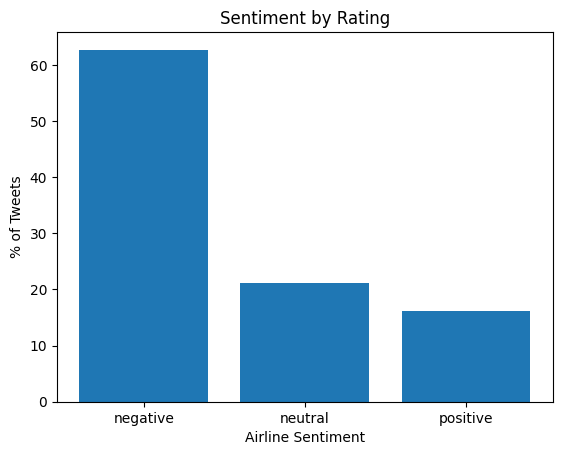

In [30]:
# let's look at the distribution of "airline_sentiment"
values,counts = np.unique(df["airline_sentiment"], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values,normalized_counts*100)
plt.xlabel("Airline Sentiment")
plt.ylabel("% of Tweets")
plt.title("Sentiment by Rating")
plt.show()

In [31]:
# check the exact percentage for each category
print(normalized_counts.round(2))

[0.63 0.21 0.16]


By checking the percentage for each categry, we see that the "negative" category takes around 63%.This can be treated as the baseline to evaluate how the models perform we are building.

In [32]:
# check what is the main reasons that caused negative reviews
df.groupby('negativereason')['negativereason'].count().sort_values(ascending=False)

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

We see that Customer Service Issue contributes the most to the negative review. Other issues are Late Flight, Cancelled Flight,Lost Luggage.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Customer Service Issue'),
  Text(1, 0, 'Late Flight'),
  Text(2, 0, "Can't Tell"),
  Text(3, 0, 'Cancelled Flight'),
  Text(4, 0, 'Lost Luggage'),
  Text(5, 0, 'Bad Flight'),
  Text(6, 0, 'Flight Booking Problems'),
  Text(7, 0, 'Flight Attendant Complaints'),
  Text(8, 0, 'longlines'),
  Text(9, 0, 'Damaged Luggage')])

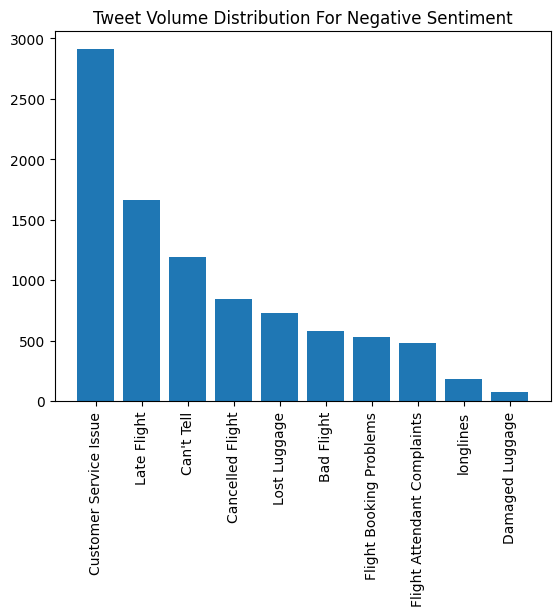

In [33]:
# visualize the Negative Review Reasons
df_by_negativereason = df.groupby('negativereason')['negativereason'].count().sort_values(ascending=False)

plt.bar(df_by_negativereason.index,df_by_negativereason)
plt.title('Tweet Volume Distribution For Negative Sentiment')
plt.xticks(rotation=90)

In [34]:
# check the how positive/neutral/positive reviews distributed across these six airline companies
df_sentiment_by_airline = df.groupby(['airline', 'airline_sentiment'])['airline'].count()/df.groupby("airline")["airline"].count()

<Figure size 640x480 with 0 Axes>

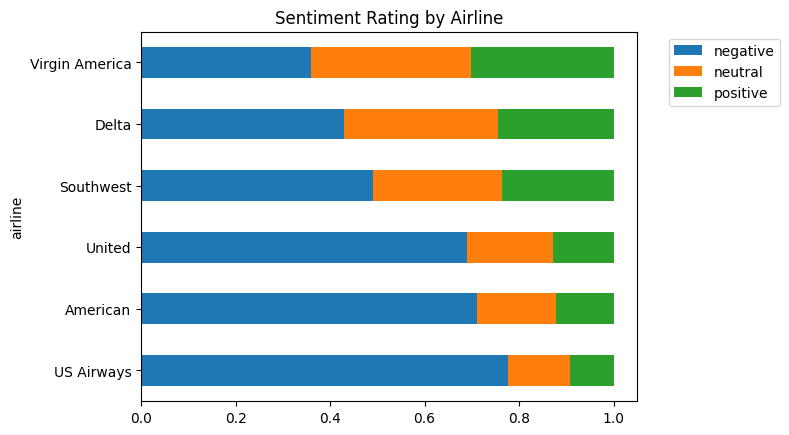

In [35]:
plt.figure()
df_sentiment_by_airline.unstack().sort_values(by="positive").plot(kind="barh",stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Sentiment Rating by Airline")
plt.show()

We see Virgin America outperforms other carriers in terms of the percentage of positive reviews.

In [139]:
# label encoding on the target feature "airline_sentiment"

from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
le = LabelEncoder()

# Fit and transform the airline_sentiment column
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])

The target variable has been converted as:  Negative: 0; Neutral 1; Positive 2.

In [140]:
# spliting the data into training and test set

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X = df["text"]
y = df["airline_sentiment"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33 ,random_state=42)

In [38]:
# check these text content to get some idea of how the data looks
X_train.values

array(['@JetBlue of course I am!!✈️',
       '@AmericanAir complt incompetence on flt 295.Lav delay from a pln that lnded last nite, no internet and poor svc. Not what I expect from u.',
       '@SouthwestAir Flight 4968 (N8325D) departs @MCO enroute to @NO_Airport http://t.co/fd4SnvKIeM',
       ...,
       '@SouthwestAir Been on hold for over an hour - any chance someone can help me on here?',
       '@united we would...how do I contact you to discuss? A few poor experiences with customer service but would give it a shot!',
       "@JetBlue that's ok! It just sure seemed like it when JetBlue tweeted us back and asked us to send selfies of us watching.. Haha"],
      dtype=object)

In [39]:
# size of training set
X_train.shape

(9808,)

**Average Tweet Length and Frequent Used Words**

In [40]:
# making a document-term matrix
bagofwords = CountVectorizer()
bagofwords.fit(X_train)
X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<9808x12056 sparse matrix of type '<class 'numpy.int64'>'
	with 156290 stored elements in Compressed Sparse Row format>

Text(0.5, 1.0, 'Tweets Length Distribution')

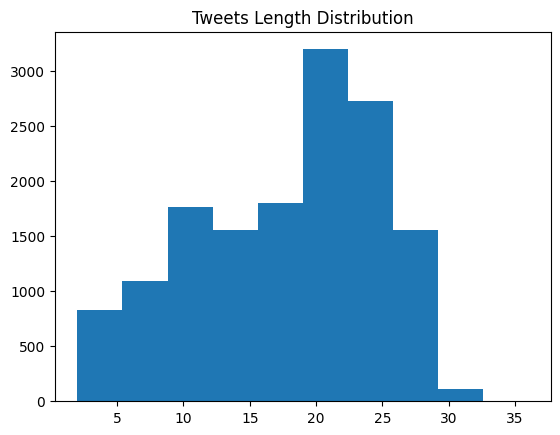

In [41]:
text_lengths = X.apply(lambda text: len(text.split()))
plt.hist(text_lengths)
plt.title("Tweets Length Distribution")

We can see  most tweet are 20-25 word long even this chart is a little positively skewed.

In [42]:
# transforming the test set
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<4832x12056 sparse matrix of type '<class 'numpy.int64'>'
	with 74703 stored elements in Compressed Sparse Row format>

In [43]:
# check the total number of transformed tokens
len(bagofwords.get_feature_names_out())

12056

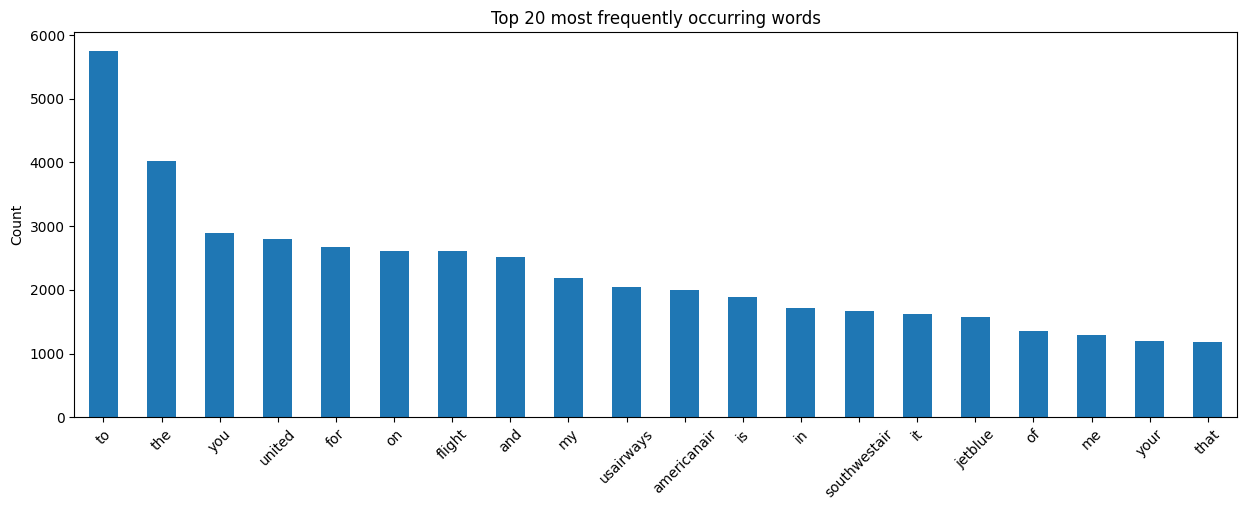

In [44]:
# visualize the most frequently occurring words
word_counts = pd.DataFrame({"counts": X_train_transformed.toarray().sum(axis=0)},
                           index = bagofwords.get_feature_names_out()).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar",figsize=(15,5),legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [45]:
# Solving Stopwords problem
# easiest way to remove stop words
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(9808, 11777)

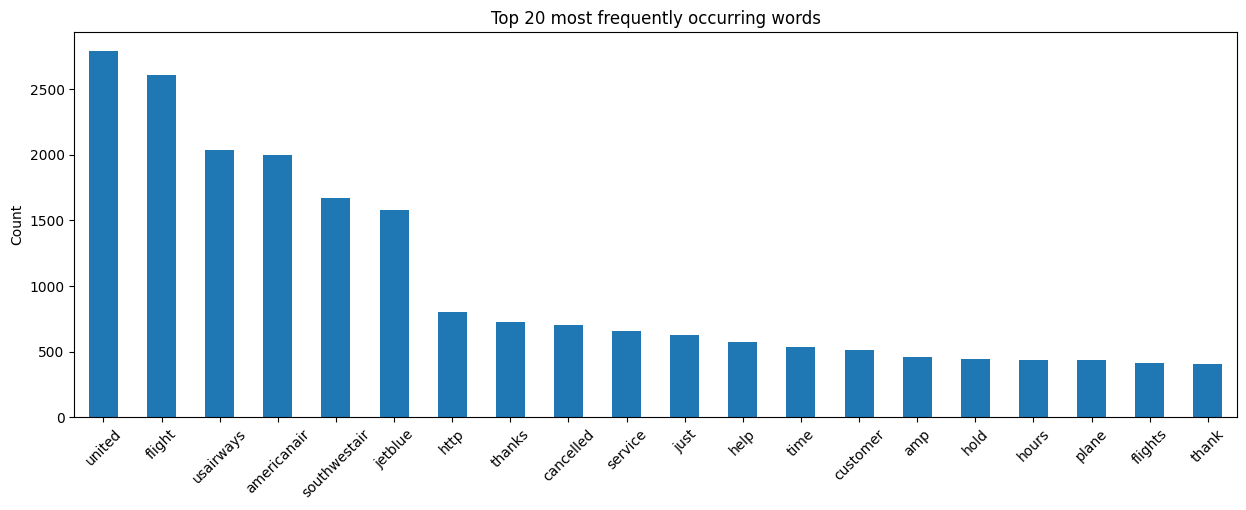

In [46]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [47]:
# chck the document-term matrix to have an idea about how the transformed data looks
term_doc = pd.DataFrame(X_train_transformed.toarray(),
                        columns=bagofwords.get_feature_names_out())
term_doc.sample(5)

,00,000,000114,000ft,0011,0016,00a,00am,00p,00pm,...,zoom,zqutus7epw,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj
2709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Model Building**

## The Bag-of-Words model


In [48]:
# Vectorization to include stopwords,max_features,min_df,max_df)
vect = CountVectorizer(stop_words='english',
                       max_features=1000,
                       min_df = 5,
                       max_df = 0.5)
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [49]:
# the data is much cleaner now
term_doc = pd.DataFrame(X_train_vect.toarray(),
                        columns=vect.get_feature_names_out())
term_doc.sample(100).T

,3965,7778,9133,4914,5275,7934,2208,9518,5576,4452,...,2021,6120,9331,6629,2918,1901,5201,1667,1208,159
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yep,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
yesterday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Logistic regression model**

In [50]:
# Classifier Training with proper cross validation
best_model = None
best_score = -np.inf
best_param = 0
for cval in np.logspace(-3,3,10):
    lr = LogisticRegression(C=cval,max_iter=1000)
    lr.fit(X_train_vect,y_train)
    score = lr.score(X_test_vect,y_test)
    print("Accuracy = {:.4f} for C={:.4f}".format(score,cval))
    if score > best_score:
        best_score = score
        best_model = lr
        best_param = cval

Accuracy = 0.6389 for C=0.0010
Accuracy = 0.6908 for C=0.0046
Accuracy = 0.7467 for C=0.0215
Accuracy = 0.7686 for C=0.1000
Accuracy = 0.7744 for C=0.4642
Accuracy = 0.7682 for C=2.1544
Accuracy = 0.7608 for C=10.0000
Accuracy = 0.7570 for C=46.4159
Accuracy = 0.7554 for C=215.4435
Accuracy = 0.7554 for C=1000.0000


In [51]:
# check which regularization strength works best.
print(f"C is: {best_param}")

C is: 0.46415888336127775


In [52]:
best_model.fit(X_train_vect,y_train)
test_acc = best_model.score(X_test_vect,y_test)
print("Our classifier test accuracy is {:.4f}".format(test_acc))

Our classifier test accuracy is 0.7744


In [53]:
# Vectorization by including both  unigrams and bigrams
vect = CountVectorizer(stop_words='english',
                       max_features=1000,
                       min_df = 5,
                       max_df = 0.5,ngram_range=(1,2))
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [54]:
# Classifier Training with proper cross validation
best_model = None
best_score = -np.inf
best_param = 0
for cval in np.logspace(-3,3,10):
    lr = LogisticRegression(C=cval,max_iter=1000)
    lr.fit(X_train_vect,y_train)
    score = lr.score(X_test_vect,y_test)
    print("Accuracy = {:.4f} for C={:.4f}".format(score,cval))
    if score > best_score:
        best_score = score
        best_model = lr
        best_param = cval

Accuracy = 0.6389 for C=0.0010
Accuracy = 0.6916 for C=0.0046
Accuracy = 0.7471 for C=0.0215
Accuracy = 0.7647 for C=0.1000
Accuracy = 0.7684 for C=0.4642
Accuracy = 0.7637 for C=2.1544
Accuracy = 0.7529 for C=10.0000
Accuracy = 0.7488 for C=46.4159
Accuracy = 0.7475 for C=215.4435
Accuracy = 0.7477 for C=1000.0000


In [55]:
best_model.fit(X_train_vect,y_train)
test_acc = best_model.score(X_test_vect,y_test)
print("Our classifier test accuracy is {:.4f}".format(test_acc))

Our classifier test accuracy is 0.7684


We can see there is no impromnet by adding bigrams.

Now Let's how logistic regression model performs on train and test set also considering different regulization method:

In [56]:
best_acc = -np.inf
best_model = None
cvals = np.logspace(-4,4,20)
trains,tests = [],[]
for cv in cvals:
    for penalty in ("l1","l2"):
        lr = LogisticRegression(C=cv,max_iter=1000,penalty=penalty,solver='liblinear')
        lr.fit(X_train_vect,y_train)
        train_score = lr.score(X_train_vect,y_train)
        test_score = lr.score(X_test_vect,y_test)
        print("Eval: C={:.6f} pen={} train={:.3f} test={:.3f}".format(cv,penalty,train_score,test_score))
        trains.append(train_score)
        tests.append(test_score)
        if test_score > best_acc:
            best_acc = test_score
            best_model = lr

Eval: C=0.000100 pen=l1 train=0.621 test=0.638
Eval: C=0.000100 pen=l2 train=0.621 test=0.638
Eval: C=0.000264 pen=l1 train=0.621 test=0.638
Eval: C=0.000264 pen=l2 train=0.621 test=0.638
Eval: C=0.000695 pen=l1 train=0.621 test=0.638
Eval: C=0.000695 pen=l2 train=0.621 test=0.638
Eval: C=0.001833 pen=l1 train=0.621 test=0.638
Eval: C=0.001833 pen=l2 train=0.629 test=0.646
Eval: C=0.004833 pen=l1 train=0.621 test=0.638
Eval: C=0.004833 pen=l2 train=0.668 test=0.685
Eval: C=0.012743 pen=l1 train=0.668 test=0.686
Eval: C=0.012743 pen=l2 train=0.709 test=0.722
Eval: C=0.033598 pen=l1 train=0.694 test=0.706
Eval: C=0.033598 pen=l2 train=0.742 test=0.748
Eval: C=0.088587 pen=l1 train=0.720 test=0.733
Eval: C=0.088587 pen=l2 train=0.774 test=0.763
Eval: C=0.233572 pen=l1 train=0.763 test=0.762
Eval: C=0.233572 pen=l2 train=0.798 test=0.772
Eval: C=0.615848 pen=l1 train=0.800 test=0.769
Eval: C=0.615848 pen=l2 train=0.812 test=0.770
Eval: C=1.623777 pen=l1 train=0.819 test=0.769
Eval: C=1.623

In [57]:
best_penalty = best_model.get_params()['penalty']
best_weight = best_model.get_params()['C']
print("Classifier: penalty={} C={:.3f} Test Acc = {:.3f}".format(best_penalty,best_weight,best_acc))

Classifier: penalty=l2 C=0.234 Test Acc = 0.772


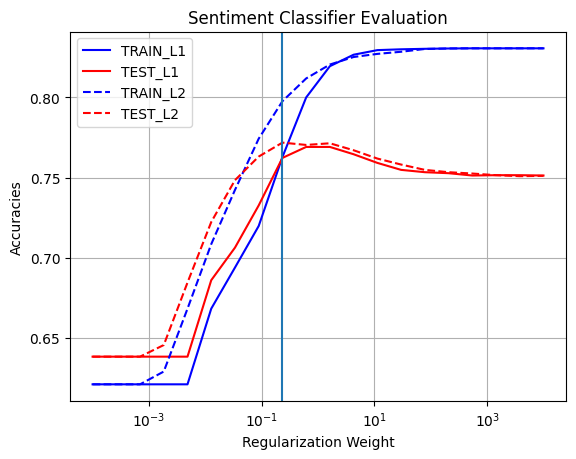

In [58]:
plt.figure()
plt.plot(cvals,trains[::2],color='blue',label="TRAIN_L1")
plt.plot(cvals,tests[::2],color='red',label="TEST_L1")
plt.plot(cvals,trains[1::2],color='blue',label="TRAIN_L2",ls="--")
plt.plot(cvals,tests[1::2],color='red',label="TEST_L2",ls="--")
plt.xscale('log')
plt.legend()
plt.xlabel("Regularization Weight")
plt.ylabel("Accuracies")
plt.title("Sentiment Classifier Evaluation")
plt.axvline(best_weight)
plt.grid()

We can achieve the accuracy of 77.2% by using logistic regression model.

**Decision Tree model**

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train_vect, y_train)

train_predictions = dt_model.predict(X_train_vect)
test_predictions = dt_model.predict(X_test_vect)
train_accuracy = accuracy_score(train_predictions,y_train)
test_accuracy = accuracy_score(test_predictions,y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.6887234910277324
Test accuracy: 0.6926738410596026


In [60]:
# create pipeling and specify selection of hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

params = {'max_depth': list(np.arange(1,20,2)),
          'criterion':   ["gini", "entropy", "log_loss"],
          'min_samples_leaf': list(np.arange(1,40,2))}

grid_search = GridSearchCV(dtree, param_grid=params,cv=5)

grid_search.fit(X_train_vect, y_train)
print(f"Train score: {grid_search.score(X_train_vect, y_train)}")
print(f"Test score: {grid_search.score(X_test_vect, y_test)}")

Train score: 0.7119698205546493
Test score: 0.7073675496688742


In [61]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=7)


We can achieve the accuracy of 70% by using decision tree model.

**Random Forest Classifier**

In [62]:
# test random forest model using 50 estimators  max_depth=10
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50,max_depth=10 )
random_forest_model.fit(X_train_vect, y_train)
random_forest_model.score(X_train_vect,y_train)

0.6385603588907015

In [63]:
random_forest_model.score(X_test_vect,y_test)

0.6496274834437086

In [64]:
# let's try different number of estimators
best_model = None
best_score = -np.inf
trains,tests = [],[]
best_est = 1
n_est = [1,2,5,10,20,50,100]
for ne in n_est:
    model = RandomForestClassifier(n_estimators=ne)
    model.fit(X_train_vect,y_train)
    train_score = model.score(X_train_vect,y_train)
    test_score = model.score(X_test_vect,y_test)
    trains.append(train_score)
    tests.append(test_score)
    if test_score > best_score:
        best_model = model
        best_score = test_score
        best_est = ne

In [65]:
print(trains)

[0.855526101141925, 0.8797920065252854, 0.9476957585644372, 0.9695146818923328, 0.9784869494290375, 0.9828711256117455, 0.9833809135399674]


In [66]:
print(tests)

[0.6359685430463576, 0.6872930463576159, 0.706953642384106, 0.7247516556291391, 0.7278559602649006, 0.7448261589403974, 0.7390314569536424]


In [67]:
print(best_score)

0.7448261589403974


If we don't limit the max_depth, the decision tree classifier always goes deeper to fit the training dataset, making the power of genenalization very weak on unseen data. Let's use cross_val_score method to verify this.

In [68]:
# using cross_vall_score method

from sklearn.model_selection import cross_val_score

best_model = None
best_score = -np.inf
depths = [1,2,3,4,5,6,7,8,9,None]
for depth in depths:
    model = RandomForestClassifier(n_estimators=100,max_depth=depth)
    cv_scores = cross_val_score(model,X_train_vect,y_train,cv=5)
    val_score = cv_scores.mean()
    if val_score > best_score:
        best_model = model
        best_score = val_score

In [69]:
best_model.fit(X_train_vect,y_train)
best_model.score(X_train_vect,y_train)

0.9834828711256117

In [70]:
best_model.score(X_test_vect,y_test)

0.7402731788079471

using GridSeachCV and Random Forest Classifier

In [71]:
# define the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_grid_test = {'n_estimators': [1,2,5,10,20,50,100],
               'max_depth': [1,5,10,30,60,80,100]}


grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = random_grid_test,
                    cv = 5)

# fit the model
grid.fit(X_train_vect,y_train)

print(f"Train score: {grid.score(X_train_vect, y_train)}")
print(f"Test score: {grid.score(X_test_vect, y_test)}")

Train score: 0.9298531810766721
Test score: 0.7510347682119205


In [72]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Adaboot Classfier**

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

abc_1 = AdaBoostClassifier(n_estimators=20)
abc_1.fit(X_train_vect, y_train)

y_pred = abc_1.predict(X_test_vect)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82      3085
           1       0.44      0.02      0.03       984
           2       0.67      0.59      0.63       763

    accuracy                           0.70      4832
   macro avg       0.61      0.52      0.49      4832
weighted avg       0.65      0.70      0.63      4832



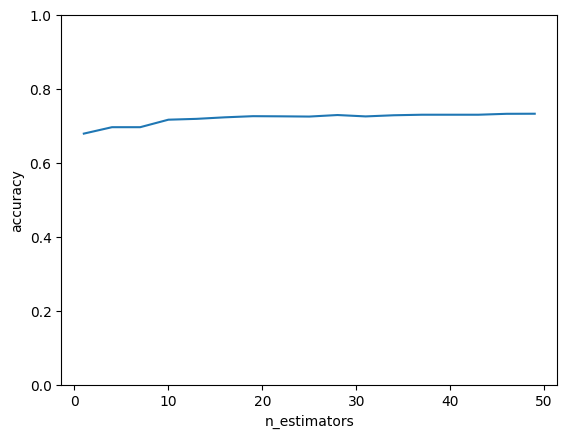

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      3085
           1       0.51      0.42      0.46       984
           2       0.67      0.59      0.63       763

    accuracy                           0.73      4832
   macro avg       0.66      0.63      0.64      4832
weighted avg       0.72      0.73      0.72      4832



In [74]:
# let's Adaboost Claissifier on different number of estimator with max_depth 2

base_tree = DecisionTreeClassifier(max_depth=2, random_state = 42)
estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    abc = AdaBoostClassifier(
        base_estimator=base_tree,
        n_estimators = n_est)

    abc.fit(X_train_vect, y_train)
    y_pred = abc.predict(X_test_vect)
    abc_scores.append(accuracy_score(y_test, y_pred))

# plot test scores and n_estimators
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.show()

print(classification_report(y_test, y_pred))

**Gradient Boostig Classifier**

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_2 = GradientBoostingClassifier()
gbc_2.fit(X_train_vect, y_train)

y_pred = gbc_2.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      3085
           1       0.70      0.18      0.29       984
           2       0.72      0.56      0.63       763

    accuracy                           0.73      4832
   macro avg       0.72      0.56      0.58      4832
weighted avg       0.73      0.73      0.69      4832



## TF-IDF Vectorization

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = nltk.stem.PorterStemmer()
import string

In [77]:
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []

    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [78]:
# vectorization using TFODF
tfidf = TfidfVectorizer(min_df=5,
                        tokenizer=my_tokenizer)
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape

(9808, 1970)

In [79]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
# build Logistic regression model on TFIDF
best_acc = -np.inf
best_model = None
cvals = np.logspace(-4,4,20)
trains,tests = [],[]
for cv in cvals:
    for penalty in ("l1","l2"):
        lr = LogisticRegression(C=cv,max_iter=1000,penalty=penalty,solver='liblinear')
        lr.fit(X_train_tfidf,y_train)
        train_score = lr.score(X_train_tfidf,y_train)
        test_score = lr.score(X_test_tfidf,y_test)
        print("Eval: C={:.6f} pen={} train={:.3f} test={:.3f}".format(cv,penalty,train_score,test_score))
        trains.append(train_score)
        tests.append(test_score)
        if test_score > best_acc:
            best_acc = test_score
            best_model = lr

Eval: C=0.000100 pen=l1 train=0.621 test=0.638
Eval: C=0.000100 pen=l2 train=0.621 test=0.638
Eval: C=0.000264 pen=l1 train=0.621 test=0.638
Eval: C=0.000264 pen=l2 train=0.621 test=0.638
Eval: C=0.000695 pen=l1 train=0.621 test=0.638
Eval: C=0.000695 pen=l2 train=0.621 test=0.638
Eval: C=0.001833 pen=l1 train=0.621 test=0.638
Eval: C=0.001833 pen=l2 train=0.621 test=0.638
Eval: C=0.004833 pen=l1 train=0.621 test=0.638
Eval: C=0.004833 pen=l2 train=0.621 test=0.638
Eval: C=0.012743 pen=l1 train=0.642 test=0.659
Eval: C=0.012743 pen=l2 train=0.630 test=0.648
Eval: C=0.033598 pen=l1 train=0.667 test=0.682
Eval: C=0.033598 pen=l2 train=0.653 test=0.671
Eval: C=0.088587 pen=l1 train=0.692 test=0.704
Eval: C=0.088587 pen=l2 train=0.695 test=0.704
Eval: C=0.233572 pen=l1 train=0.729 test=0.739
Eval: C=0.233572 pen=l2 train=0.753 test=0.752
Eval: C=0.615848 pen=l1 train=0.778 test=0.776
Eval: C=0.615848 pen=l2 train=0.807 test=0.783
Eval: C=1.623777 pen=l1 train=0.839 test=0.795
Eval: C=1.623

In [81]:
best_penalty = best_model.get_params()['penalty']
best_weight = best_model.get_params()['C']
print("Classifier: penalty={} C={:.3f} Test Acc = {:.3f}".format(best_penalty,best_weight,best_acc))

Classifier: penalty=l2 C=4.281 Test Acc = 0.800


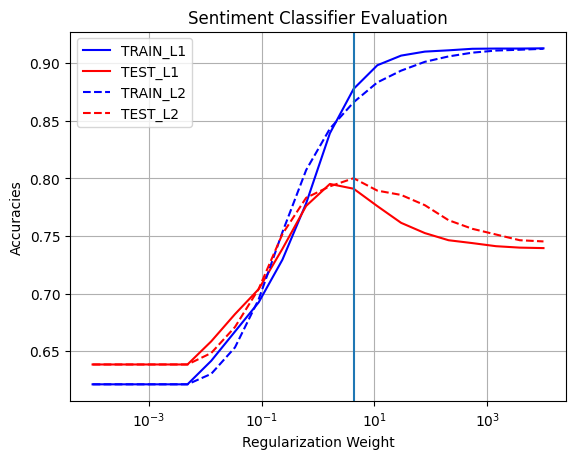

In [82]:
plt.figure()
plt.plot(cvals,trains[::2],color='blue',label="TRAIN_L1")
plt.plot(cvals,tests[::2],color='red',label="TEST_L1")
plt.plot(cvals,trains[1::2],color='blue',label="TRAIN_L2",ls="--")
plt.plot(cvals,tests[1::2],color='red',label="TEST_L2",ls="--")
plt.xscale('log')
plt.legend()
plt.xlabel("Regularization Weight")
plt.ylabel("Accuracies")
plt.title("Sentiment Classifier Evaluation")
plt.axvline(best_weight)
plt.grid()

Using TFIDF and customized tokeners, we can achieve the accuracy of 80%,
(3% higher than bag of words).

In [83]:
# run Decision tree on TFIDF
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

params = {'max_depth': list(np.arange(1,20,2)),
          'criterion':   ["gini", "entropy", "log_loss"],
          'min_samples_leaf': list(np.arange(1,40,2))}

grid_search = GridSearchCV(dtree, param_grid=params,cv=5)

grid_search.fit(X_train_tfidf, y_train)
print(f"Train score: {grid_search.score(X_train_tfidf, y_train)}")
print(f"Test score: {grid_search.score(X_test_tfidf, y_test)}")

Train score: 0.7880301794453507
Test score: 0.7201986754966887


In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

abc_1 = AdaBoostClassifier(n_estimators=20)
abc_1.fit(X_train_tfidf, y_train)

y_pred = abc_1.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82      3085
           1       0.56      0.02      0.04       984
           2       0.67      0.59      0.63       763

    accuracy                           0.71      4832
   macro avg       0.65      0.52      0.50      4832
weighted avg       0.68      0.71      0.63      4832



In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_2 = GradientBoostingClassifier()
gbc_2.fit(X_train_tfidf, y_train)

y_pred = gbc_2.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      3085
           1       0.66      0.29      0.40       984
           2       0.76      0.58      0.65       763

    accuracy                           0.75      4832
   macro avg       0.73      0.60      0.63      4832
weighted avg       0.74      0.75      0.72      4832



# **Word Embedding**

In [141]:
import gensim
from gensim.utils import simple_preprocess

In [142]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    'https://www.dropbox.com/s/kguufyc2xcdi8yk/lexvec.enwiki%2Bnewscrawl.300d.W.pos.vectors.gz?dl=1', binary=False
)

In [143]:
def sentence2vec(text):
    """
    Embed a sentence by averaging the word vectors of the tokenized text. Out-of-vocabulary words are replaced by the zero-vector.
    -----

    Input: text (string)
    Output: embedding vector (np.array)
    """
    tokenized = simple_preprocess(text)

    word_embeddings = [np.zeros(300)]
    for word in tokenized:
        # if the word is in the model then embed
        if word in model:
            vector = model[word]
        # add zeros for out-of-vocab words
        else:
            vector = np.zeros(300)

        word_embeddings.append(vector)

    # average the word vectors
    sentence_embedding = np.stack(word_embeddings).mean(axis=0)

    return sentence_embedding

In [144]:
X_train_emb = X_train.apply(sentence2vec)
X_train_emb = np.array(X_train_emb.tolist())

In [145]:
X_test_emb = X_test.apply(sentence2vec)
X_test_emb = np.array(X_test_emb.tolist())

In [146]:
X_train_emb.shape

(9808, 300)

**Logistic Regression**

In [92]:
logreg = LogisticRegression(max_iter=1000,solver='liblinear')
grid_search = GridSearchCV(logreg, {"C": np.logspace(-4,4,20),
                                    "penalty":["l1","l2"]})
grid_search.fit(X_train_emb, y_train)
print("Best parameters: ", grid_search.best_params_)
grid_search.best_score_

Best parameters:  {'C': 11.288378916846883, 'penalty': 'l2'}


0.7785475279676423

In [93]:
best_lr = grid_search.best_estimator_

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
grid_search = GridSearchCV(rf, {"max_depth": np.arange(3,50,2)})
grid_search.fit(X_train_emb, y_train)
print("Best parameters: ", grid_search.best_params_)
grid_search.best_score_

Best parameters:  {'max_depth': 33}


0.7206357820517418

In [95]:
best_rf = grid_search.best_estimator_

**Neural Network on Word Embedding**

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [97]:
from tensorflow.keras import regularizers
reg = regularizers.L1L2(l1=1e-5, l2=1e-4)

nn_model = keras.Sequential()
nn_model.add(layers.Dense(128, activation="relu",kernel_regularizer=reg))
nn_model.add(layers.Dense(128, activation="relu",kernel_regularizer=reg))
nn_model.add(layers.Dense(64, activation="relu",kernel_regularizer=reg))
nn_model.add(layers.Dense(32, activation="relu",kernel_regularizer=reg))
nn_model.add(layers.Dense(8, activation="relu",kernel_regularizer=reg))
nn_model.add(layers.Dense(3, activation="softmax")) # output layer

nn_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=keras.metrics.SparseCategoricalAccuracy()
)

# train the model
history = nn_model.fit(X_train_emb.astype(np.float32), y_train,
                    validation_split=0.2,
                    epochs=20,
                    verbose=1)

Epoch 1/20
246/246 [==============================] - 3s 5ms/step - loss: 0.7863 - sparse_categorical_accuracy: 0.7055 - val_loss: 0.6887 - val_sparse_categorical_accuracy: 0.7564
Epoch 2/20
246/246 [==============================] - 1s 4ms/step - loss: 0.6325 - sparse_categorical_accuracy: 0.7771 - val_loss: 0.6632 - val_sparse_categorical_accuracy: 0.7604
Epoch 3/20
246/246 [==============================] - 1s 3ms/step - loss: 0.6091 - sparse_categorical_accuracy: 0.7803 - val_loss: 0.6792 - val_sparse_categorical_accuracy: 0.7543
Epoch 4/20
246/246 [==============================] - 1s 4ms/step - loss: 0.5753 - sparse_categorical_accuracy: 0.7962 - val_loss: 0.6366 - val_sparse_categorical_accuracy: 0.7615
Epoch 5/20
246/246 [==============================] - 1s 4ms/step - loss: 0.5636 - sparse_categorical_accuracy: 0.7994 - val_loss: 0.6249 - val_sparse_categorical_accuracy: 0.7747
Epoch 6/20
246/246 [==============================] - 1s 3ms/step - loss: 0.5453 - sparse_categorica

In [98]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               38528     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 8)                 264       
                                                                 
 dense_17 (Dense)            (None, 3)                 27        
                                                                 
Total params: 65667 (256.51 KB)
Trainable params: 6566

In [134]:
# Get probabilities  of each catogory for  each obervations
predictions = nn_model.predict(X_train_emb)

307/307 [==============================] - 1s 2ms/step


In [100]:
# find the highest probality for the prodicted catogory
predictions_df = pd.DataFrame(predictions)
predictions_df["predictions"] = predictions_df.idxmax(axis=1)

print(classification_report(y_train,predictions_df["predictions"]))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6093
           1       0.93      0.62      0.74      2115
           2       0.82      0.91      0.87      1600

    accuracy                           0.88      9808
   macro avg       0.88      0.83      0.84      9808
weighted avg       0.89      0.88      0.88      9808



In [156]:
X_test_pred = nn_model.predict(X_test_emb)

151/151 [==============================] - 0s 2ms/step


In [159]:
X_test_pred

array([[1.9499887e-03, 3.9231540e-03, 9.9412680e-01],
       [9.4213402e-01, 5.0106041e-02, 7.7599445e-03],
       [9.9764109e-01, 1.4921030e-03, 8.6691149e-04],
       ...,
       [9.4485563e-01, 2.3772703e-02, 3.1371582e-02],
       [1.8431025e-02, 6.1801988e-01, 3.6354908e-01],
       [5.9072828e-01, 1.8272261e-01, 2.2654909e-01]], dtype=float32)

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def calculate_tpr_fpr(y_real, y_pred):

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    return tpr, fpr


def get_all_roc_coordinates(y_real, y_proba):

    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

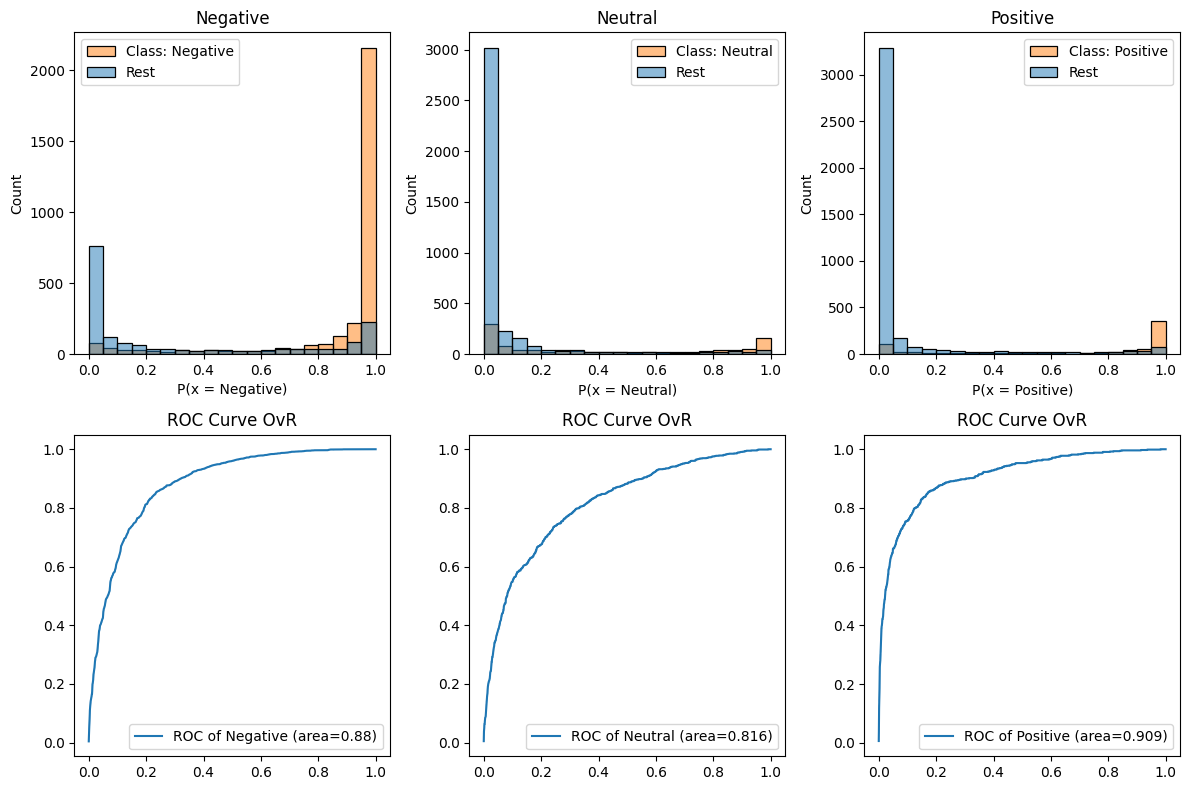

In [180]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = [0,1,2]
airline_sentiment = ['Negative','Neutral','Positive']

for i in classes:

    # Prepares an auxiliar dataframe to help with the plots
    df_X_test= pd.DataFrame(X_test)
    df_X_test['class'] = [1 if y == i else 0 for y in y_test]
    df_X_test['prob'] = X_test_pred[:, i]
    df_X_test = df_X_test.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_X_test, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(airline_sentiment[i])
    ax.legend([f"Class: {airline_sentiment[i]}", "Rest"])
    ax.set_xlabel(f"P(x = {airline_sentiment[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_X_test['class'], df_X_test['prob'])
    auc = round(roc_auc_score(df_X_test['class'], df_X_test['prob']),3)
    sns.lineplot(x = fpr, y = tpr, ax = ax_bottom, label=f'ROC of {airline_sentiment[i]} (area={auc})')
    ax_bottom.set_title("ROC Curve OvR")

plt.tight_layout()
plt.savefig("rocplot.png")

In [101]:
# find the number of epoches to prevent overfitting
from tensorflow.keras import regularizers
reg = regularizers.L1L2(l1=1e-5, l2=1e-4)

model = keras.Sequential()
model.add(layers.Dense(128, activation="relu",kernel_regularizer=reg))
model.add(layers.Dense(128, activation="relu",kernel_regularizer=reg))
model.add(layers.Dense(64, activation="relu",kernel_regularizer=reg))
model.add(layers.Dense(32, activation="relu",kernel_regularizer=reg))
model.add(layers.Dense(8, activation="relu",kernel_regularizer=reg))
model.add(layers.Dense(3, activation="softmax")) # output layer

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=keras.metrics.SparseCategoricalAccuracy()
)

# train our model
history = model.fit(X_train_emb.astype(np.float32), y_train,
                    validation_data=(X_test_emb,y_test),
                    epochs=50,
                    verbose=1)

Epoch 1/50
307/307 [==============================] - 4s 8ms/step - loss: 0.7813 - sparse_categorical_accuracy: 0.7020 - val_loss: 0.6244 - val_sparse_categorical_accuracy: 0.7713
Epoch 2/50
307/307 [==============================] - 1s 4ms/step - loss: 0.6221 - sparse_categorical_accuracy: 0.7699 - val_loss: 0.6106 - val_sparse_categorical_accuracy: 0.7726
Epoch 3/50
307/307 [==============================] - 1s 4ms/step - loss: 0.5976 - sparse_categorical_accuracy: 0.7828 - val_loss: 0.5708 - val_sparse_categorical_accuracy: 0.7901
Epoch 4/50
307/307 [==============================] - 1s 4ms/step - loss: 0.5751 - sparse_categorical_accuracy: 0.7922 - val_loss: 0.5879 - val_sparse_categorical_accuracy: 0.7794
Epoch 5/50
307/307 [==============================] - 1s 4ms/step - loss: 0.5711 - sparse_categorical_accuracy: 0.7934 - val_loss: 0.5583 - val_sparse_categorical_accuracy: 0.7959
Epoch 6/50
307/307 [==============================] - 1s 4ms/step - loss: 0.5573 - sparse_categorica

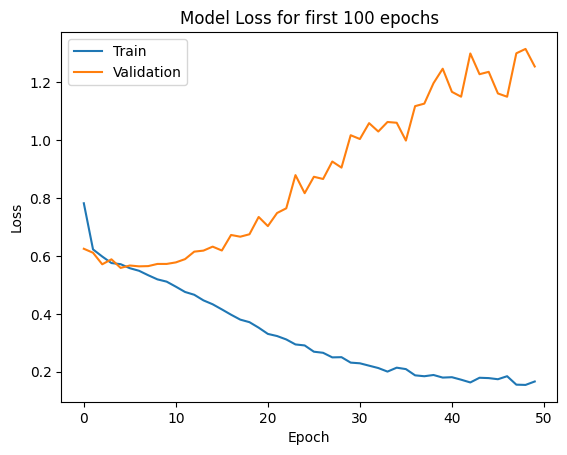

In [102]:
plt.plot(history.history['loss'][:500])
plt.plot(history.history['val_loss'][:500])
plt.title('Model Loss for first 100 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Recursive Neural Network

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Dropout, Bidirectional, Embedding, LSTM, GRU, BatchNormalization, TextVectorization,Input,SimpleRNN
from tensorflow.keras.optimizers import Adam

import random

In [104]:
def set_random_seed(seed):

    '''Random seeds for reproducability'''

    random.seed(seed)
    tf.random.set_seed(seed)

In [105]:
# label encoding on the target feature "airline_sentiment"

from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
le = LabelEncoder()

# Fit and transform the airline_sentiment column
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])

In [106]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

In [107]:
vectorizer_layer = TextVectorization(max_tokens=2000)

vectorizer_layer.adapt(X_train)

In [108]:
vocabulary = np.array(vectorizer_layer.get_vocabulary())

In [ ]:
vocabulary[0:5]

array(['', '[UNK]', 'to', 'the', 'i'], dtype='<U18')

In [109]:
set_random_seed(121)

embedding_layer = Embedding(
        input_dim = len(vocabulary),
        output_dim=8,
        mask_zero=True
)

## SimpleRNN model

In [110]:
# random seed for reproducability
set_random_seed(121)

RNN_model = Sequential([

    Input(shape=(1,), dtype="string"),

    # index text
    vectorizer_layer,

    # embed to vectors
    embedding_layer,

    # recurrent layer
    SimpleRNN(16, activation='relu', return_sequences=False),
    Dropout(0.2),

    # dense transformation
    Dense(4, activation='relu'),
    Dropout(0.2),

    # output layer
    Dense(3, activation='softmax')
], name="sentiment_model")

In [111]:
# Compile model
RNN_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [112]:
# Display its summary
RNN_model.summary()

Model: "sentiment_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 8)           16000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 4)                 68        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                   

In [113]:
# random seed for reproducability
set_random_seed(121)

num_epochs = 20
RNN_model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=num_epochs,
    validation_split=0.2
)

Epoch 1/20
147/147 [==============================] - 6s 25ms/step - loss: 0.9382 - accuracy: 0.6201 - val_loss: 0.7508 - val_accuracy: 0.6265
Epoch 2/20
147/147 [==============================] - 2s 13ms/step - loss: 0.7427 - accuracy: 0.6332 - val_loss: 0.7106 - val_accuracy: 0.6910
Epoch 3/20
147/147 [==============================] - 2s 13ms/step - loss: 0.6827 - accuracy: 0.7113 - val_loss: 0.6863 - val_accuracy: 0.7064
Epoch 4/20
147/147 [==============================] - 2s 13ms/step - loss: 0.6386 - accuracy: 0.7306 - val_loss: 0.6857 - val_accuracy: 0.7059
Epoch 5/20
147/147 [==============================] - 2s 13ms/step - loss: 0.6012 - accuracy: 0.7416 - val_loss: 0.7120 - val_accuracy: 0.7102
Epoch 6/20
147/147 [==============================] - 2s 13ms/step - loss: 0.5760 - accuracy: 0.7473 - val_loss: 0.6994 - val_accuracy: 0.7008
Epoch 7/20
147/147 [==============================] - 3s 23ms/step - loss: 0.5509 - accuracy: 0.7499 - val_loss: 0.7437 - val_accuracy: 0.6970

## LSTM model

In [114]:
# random seed for reproducability
set_random_seed(121)

RNN_model = Sequential([

    Input(shape=(1,), dtype="string"),

    # index text
    vectorizer_layer,

    # embed to vectors
    embedding_layer,

    # recurrent layer
    LSTM(16, activation='relu', return_sequences=False),
    Dropout(0.2),

    # dense transformation
    Dense(4, activation='relu'),
    Dropout(0.2),

    # output layer
    Dense(3, activation='softmax')
], name="sentiment_model")

In [115]:
# Compile model
RNN_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [116]:
# Display its summary
RNN_model.summary()

Model: "sentiment_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 8)           16000     
                                                                 
 lstm (LSTM)                 (None, 16)                1600      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 4)                 68        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                   

In [117]:
# random seed for reproducability
set_random_seed(121)

num_epochs = 10
RNN_model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=num_epochs,
    validation_split=0.2
)

Epoch 1/10
147/147 [==============================] - 7s 25ms/step - loss: 0.9419 - accuracy: 0.6178 - val_loss: 0.7738 - val_accuracy: 0.6265
Epoch 2/10
147/147 [==============================] - 3s 21ms/step - loss: 0.7774 - accuracy: 0.6396 - val_loss: 0.7044 - val_accuracy: 0.6816
Epoch 3/10
147/147 [==============================] - 3s 20ms/step - loss: 0.6989 - accuracy: 0.7028 - val_loss: 0.6753 - val_accuracy: 0.7298
Epoch 4/10
147/147 [==============================] - 4s 30ms/step - loss: 0.6513 - accuracy: 0.7256 - val_loss: 0.6643 - val_accuracy: 0.7392
Epoch 5/10
147/147 [==============================] - 3s 22ms/step - loss: 0.6154 - accuracy: 0.7383 - val_loss: 0.6778 - val_accuracy: 0.7392
Epoch 6/10
147/147 [==============================] - 3s 20ms/step - loss: 0.5492 - accuracy: 0.7434 - val_loss: 0.7677 - val_accuracy: 0.7443
Epoch 7/10
147/147 [==============================] - 3s 20ms/step - loss: 0.5232 - accuracy: 0.7575 - val_loss: 1.1212 - val_accuracy: 0.7503

## GRU model

In [118]:
# random seed for reproducability
set_random_seed(121)

RNN_model = Sequential([

    Input(shape=(1,), dtype="string"),

    # index text
    vectorizer_layer,

    # embed to vectors
    embedding_layer,

    # recurrent layer
    GRU(16, activation='relu', return_sequences=False),
    Dropout(0.2),

    # dense transformation
    Dense(4, activation='relu'),
    Dropout(0.2),

    # output layer
    Dense(3, activation='softmax')
], name="sentiment_model")

In [119]:
# Compile model
RNN_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [120]:
# Display its summary
RNN_model.summary()

Model: "sentiment_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 8)           16000     
                                                                 
 gru (GRU)                   (None, 16)                1248      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 4)                 68        
                                                                 
 dropout_5 (Dropout)         (None, 4)                 0         
                                                   

In [121]:
# random seed for reproducability
set_random_seed(121)

num_epochs = 10
RNN_model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=num_epochs,
    validation_split=0.2
)

Epoch 1/10
147/147 [==============================] - 7s 32ms/step - loss: 0.9469 - accuracy: 0.6163 - val_loss: 0.7327 - val_accuracy: 0.6265
Epoch 2/10
147/147 [==============================] - 3s 19ms/step - loss: 0.6125 - accuracy: 0.6882 - val_loss: 0.6554 - val_accuracy: 0.7089
Epoch 3/10
147/147 [==============================] - 3s 18ms/step - loss: 0.5503 - accuracy: 0.7196 - val_loss: 0.7346 - val_accuracy: 0.7213
Epoch 4/10
147/147 [==============================] - 3s 19ms/step - loss: 0.5172 - accuracy: 0.7429 - val_loss: 0.7719 - val_accuracy: 0.7170
Epoch 5/10
147/147 [==============================] - 4s 29ms/step - loss: 0.4995 - accuracy: 0.7524 - val_loss: 0.8154 - val_accuracy: 0.7204
Epoch 6/10
147/147 [==============================] - 3s 18ms/step - loss: 0.4741 - accuracy: 0.7721 - val_loss: 0.9639 - val_accuracy: 0.7443
Epoch 7/10
147/147 [==============================] - 3s 19ms/step - loss: 0.4588 - accuracy: 0.7867 - val_loss: 1.0534 - val_accuracy: 0.7405

We built 3 RNN models:  SimpleRNN, LSTM and GRU.
All the accuracy scores are around 75%, which is even lower than
neural network we trained aboove.